##Over Sampling with Feed-Forward Neural Network

In [98]:
# importing libraries for Machine learning

from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [99]:
# Assuming 'df_cleaned' is your DataFrame containing the dataset
X = df_cleaned.drop(columns=['Brain Stroke'])
Y = df_cleaned['Brain Stroke']

# Encode categorical features using pandas get_dummies
feautures_encoded = pd.get_dummies(X)

# Splitting the encoded dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(feautures_encoded, Y, test_size=0.2, random_state=42)

In [100]:
# importing libraries for Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
# Assuming 'df_cleaned' is your DataFrame containing the dataset
X = df_cleaned.drop(columns=['Brain Stroke'])
Y = df_cleaned['Brain Stroke']

# Encode categorical features using pandas get_dummies
feautures_encoded = pd.get_dummies(X)

# Splitting the encoded dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(feautures_encoded, Y, test_size=0.2, random_state=42)

In [102]:
# Ensure the data types are compatible with TensorFlow
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(Y_test).astype('float32')

# Apply oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train, Y_train)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resampled, Y_train_resampled, epochs=1000, batch_size=32, validation_split=0.2, callbacks=stopping)

Epoch 1/1000
1588/1588 [==============================] - 6s 3ms/step - loss: 0.5475 - accuracy: 0.7340 - val_loss: 0.7514 - val_accuracy: 0.5638
Epoch 2/1000
1588/1588 [==============================] - 3s 2ms/step - loss: 0.4934 - accuracy: 0.7466 - val_loss: 0.4272 - val_accuracy: 0.8182
Epoch 3/1000
1588/1588 [==============================] - 4s 2ms/step - loss: 0.4812 - accuracy: 0.7549 - val_loss: 0.8260 - val_accuracy: 0.5515
Epoch 4/1000
1588/1588 [==============================] - 3s 2ms/step - loss: 0.4742 - accuracy: 0.7578 - val_loss: 0.7865 - val_accuracy: 0.5739
Epoch 5/1000
1588/1588 [==============================] - 4s 3ms/step - loss: 0.4718 - accuracy: 0.7564 - val_loss: 0.6251 - val_accuracy: 0.7088
Epoch 6/1000
1588/1588 [==============================] - 3s 2ms/step - loss: 0.4656 - accuracy: 0.7627 - val_loss: 0.6563 - val_accuracy: 0.6775
Epoch 7/1000
1588/1588 [==============================] - 3s 2ms/step - loss: 0.4611 - accuracy: 0.7635 - val_loss: 0.7000 -

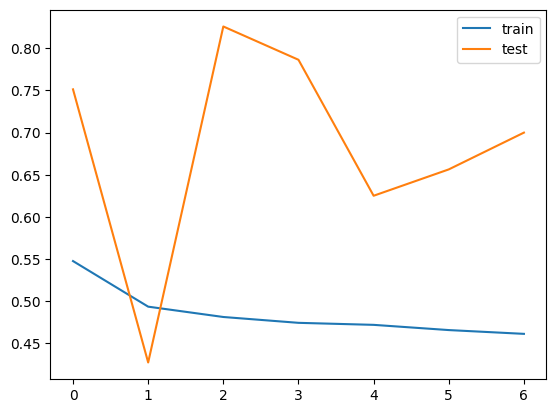

In [103]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [104]:
# Predict the target variable on the test data
y_pred_proba = model.predict(X_test)
FNN_pred = np.round(y_pred_proba).astype(int)

# Calculate accuracy
accuracy = accuracy_score(Y_test, FNN_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(Y_test, FNN_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, FNN_pred))

253/253 [==============================] - 0s 1ms/step
Accuracy: 0.7043994068215521

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      7919
           1       0.06      0.84      0.11       173

    accuracy                           0.70      8092
   macro avg       0.53      0.77      0.47      8092
weighted avg       0.97      0.70      0.81      8092


Confusion Matrix:
[[5555 2364]
 [  28  145]]
